<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 6,5>Final Project 4</font></h1>


<h2> Group 4 <h2>

- Gilbert Aryaduta Pinem
- Dian Pramesti
- Irfan Musa
- Koriatul Qibtiah

PYTN-KS-011 <br>
Studi Independen - Kampus Merdeka

# 1. PERKENALAN

## 1.1 Latar Belakang

Strategi pemasaran adalah rencana atau langkah-langkah yang dirancang untuk mencapai tujuan pemasaran perusahaan diantaranya meningkatkan kesadaran, minat, dan pembelian produk atau layanan perusahaan. Strategi pemasaran yang tepat dengan segmentasi pasar yang sesuai sasaran sangat penting untuk mempengaruhi pertumbuhan kredit di era persaingan antar bank yang semakin tinggi.

## 1.2 Dataset



Dataset yang digunakan adalah dataset yang berjudul Credit Card Dataset for Clustering  yang berasal diambil dari website kaggle <a href="https://www.kaggle.com/datasets/arjunbhasin2013/ccdata" title="Credit Card Dataset for Clustering">Credit Card Dataset for Clustering</a>. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan dengan 18 atribut.


## 1.3 Objektif yang ingin dicapai

Objektif yang ingin dicapai antara lain:
- Memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mempersiapkan data untuk digunakan dalam Clustering
- Mengimplementasikan Clustering pada data yang diberikan

# 2. IMPORT PUSTAKA YANG DIBUTUHKAN

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

# 3. DATA LOADING

Dataset yang digunakan adalah <a href="https://www.kaggle.com/datasets/arjunbhasin2013/ccdata" title="Credit Card Dataset for Clustering">Credit Card Dataset for Clustering</a>.

## 3.1 Proses Data Loading

In [2]:
# Mentransformasikan file yang ada di google drive
! gdown --id 1lZwakuiywscHJOOJvV5a3xw_9Ec6JoZj

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Read Dataset
df = pd.read_csv('CC GENERAL.csv')
# Menampilkan Dataset
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## 3.2 Eksplorasi Data Sederhana

In [4]:
# Menampilkan informasi tiap kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Tipe data pada dataset ini antara lain float, object, dan integer.

In [5]:
# Melihat bentuk dari dataset
df.shape

(8950, 18)

Dataset terdiri dari 8950 baris dan 18 kolom.

In [6]:
# Melihat 5 Data teratas
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
# Melihat 5 data terbawah
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Dari hasil diatas dapat diambil kesimpulan antara lain:
- Rata-rata atribut BALANCE adalah 1564.47
- Nilai max pada atribut BALANCE_FREQUENCY adalah 1.00
- Nilai min pada atribut PURCHASES adalah 0.00

In [9]:
# Menampilkan nama kolom pada dataset
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [10]:
# Mengelompokkan tiap kolom berdasarkan kategorikal dan numerikal

# Variabel bertipe kategorik
categorical = list(df.select_dtypes(include=['object']).columns)

# Variabel bertipe numerik
numerical = list(df.select_dtypes(exclude=['object']).columns)

# Vr
# Menampilkan kolom-kolom kategorikal dan numerikal
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['CUST_ID'] 
 numerical:  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


# 4. DATA CLEANING <br>
Data pre-processing adalah tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten.

In [11]:
# Mengecek missing values pada dataset
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Pada atribut credit_limit dan minimum_payments masih memiliki missing values.

In [12]:
# Menghitung persentase missing values pada setiap atribut
df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)

CUST_ID                              0.0 %
PAYMENTS                             0.0 %
PURCHASES_TRX                        0.0 %
CASH_ADVANCE_TRX                     0.0 %
CASH_ADVANCE_FREQUENCY               0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY     0.0 %
PRC_FULL_PAYMENT                     0.0 %
ONEOFF_PURCHASES_FREQUENCY           0.0 %
CASH_ADVANCE                         0.0 %
INSTALLMENTS_PURCHASES               0.0 %
ONEOFF_PURCHASES                     0.0 %
PURCHASES                            0.0 %
BALANCE_FREQUENCY                    0.0 %
BALANCE                              0.0 %
PURCHASES_FREQUENCY                  0.0 %
TENURE                               0.0 %
CREDIT_LIMIT                        0.01 %
MINIMUM_PAYMENTS                     3.5 %
dtype: object

Menghilangkan missing values

In [13]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
# Mengecek missing values pada dataset
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Sudah tidak ada lagi atribut yang memiliki missing values.

In [15]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

Tidak ada data yang duplikat.

In [16]:
# Mengganti nama
df = df.rename(columns={'CUST_ID':'ID_PELANGGAN',
    'BALANCE':'SALDO',
    'BALANCE_FREQUENCY' : 'FREKUENSI_SALDO',
    'PURCHASES' : 'PEMBELIAN',
    'ONEOFF_PURCHASES':'PEMBELIAN_ONEOFF',
    'INSTALLMENTS_PURCHASES':'PEMBELIAN_ANGSURAN',
    'CASH_ADVANCE':'PENARIKAN_TUNAI',
    'PURCHASES_FREQUENCY':'FREKUENSI_PEMBELIAN',
    'ONEOFF_PURCHASES_FREQUENCY':'FREKUENSI_PEMBELIAN_ONEOFF',
    'PURCHASES_INSTALLMENTS_FREQUENCY':'FREKUENSI_PEMBELIAN_ANGSURAN',
    'CASH_ADVANCE_FREQUENCY':'FREKUENSI_PENARIKAN_TUNAI',
    'CASH_ADVANCE_TRX':'TRANSAKSI_PENARIKAN_TUNAI',
    'PURCHASES_TRX':'TRANSAKSI_PEMBELIAN',
    'CREDIT_LIMIT':'BATAS_KREDIT',
    'PAYMENTS':'PEMBAYARAN',
    'MINIMUM_PAYMENTS':'PEMBAYARAN_MINIMAL',
    'PRC_FULL_PAYMENT':'PEMBAYARAN_PENUH',
    'TENURE':'MASA_PENGGUNAAN'})

Keterangan:
1. IDPELANGGAN - Identifikasi pemegang kartu kredit (Kategorikal)
2. SALDO - Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
3. FREKUENSISALDO - Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = diperbarui secara sering, 0 = tidak diperbarui secara sering)
4. PEMBELIAN - Jumlah pembelian yang dilakukan dari akun
5. PEMBELIANONEOFF - Jumlah pembelian maksimum yang dilakukan dalam satu kali transaksi
6. PEMBELIANANGSURAN - Jumlah pembelian yang dilakukan dengan angsuran
7. PENARIKANTUNAI - Uang tunai yang diberikan oleh pengguna sebagai pencairan tunai
8. FREKUENSIPEMBELIAN - Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. FREKUENSIPEMBELIANONEOFF - Seberapa sering Pembelian dilakukan dalam satu kali transaksi (1 = sering dibeli, 0 = tidak sering dibeli)
10. FREKUENSIPEMBELIANANGSURAN - Seberapa sering pembelian dengan angsuran dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. FREKUENSIPENARIKANTUNAI - Seberapa sering pencairan tunai dibayarkan
12. TRANSAKSIPENARIKANTUNAI - Jumlah transaksi yang dilakukan dengan "Cash in Advance"
13. TRANSAKSIPEMBELIAN - Jumlah transaksi pembelian yang dilakukan
14. BATASKREDIT - Batas Kredit Kartu untuk pengguna
15. PEMBAYARAN - Jumlah Pembayaran yang dilakukan oleh pengguna
16. PEMBAYARANMINIMAL - Jumlah pembayaran minimum yang dilakukan oleh pengguna
17. PEMBAYARANPENUH - Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. MASAPENGGUNAAN - Masa layanan kartu kredit bagi pengguna

In [17]:
df

,ID_PELANGGAN,SALDO,FREKUENSI_SALDO,PEMBELIAN,PEMBELIAN_ONEOFF,PEMBELIAN_ANGSURAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_ONEOFF,FREKUENSI_PEMBELIAN_ANGSURAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMAL,PEMBAYARAN_PENUH,MASA_PENGGUNAAN
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [18]:
# Menghapus kolom CUST_ID
df.drop(columns=["ID_PELANGGAN"], inplace=True)

df.head(2)

,SALDO,FREKUENSI_SALDO,PEMBELIAN,PEMBELIAN_ONEOFF,PEMBELIAN_ANGSURAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_ONEOFF,FREKUENSI_PEMBELIAN_ANGSURAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMAL,PEMBAYARAN_PENUH,MASA_PENGGUNAAN
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [19]:
df.shape

(8950, 17)

Awalnya dataset terdiri dari 8950 baris dan 18 kolom, namun sekarang menjadi 8949 baris dan 17 kolom.

# 5. EXPLORATORY DATA ANALYSIS <br>
Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## 5.1 Visualisasi Data <br>

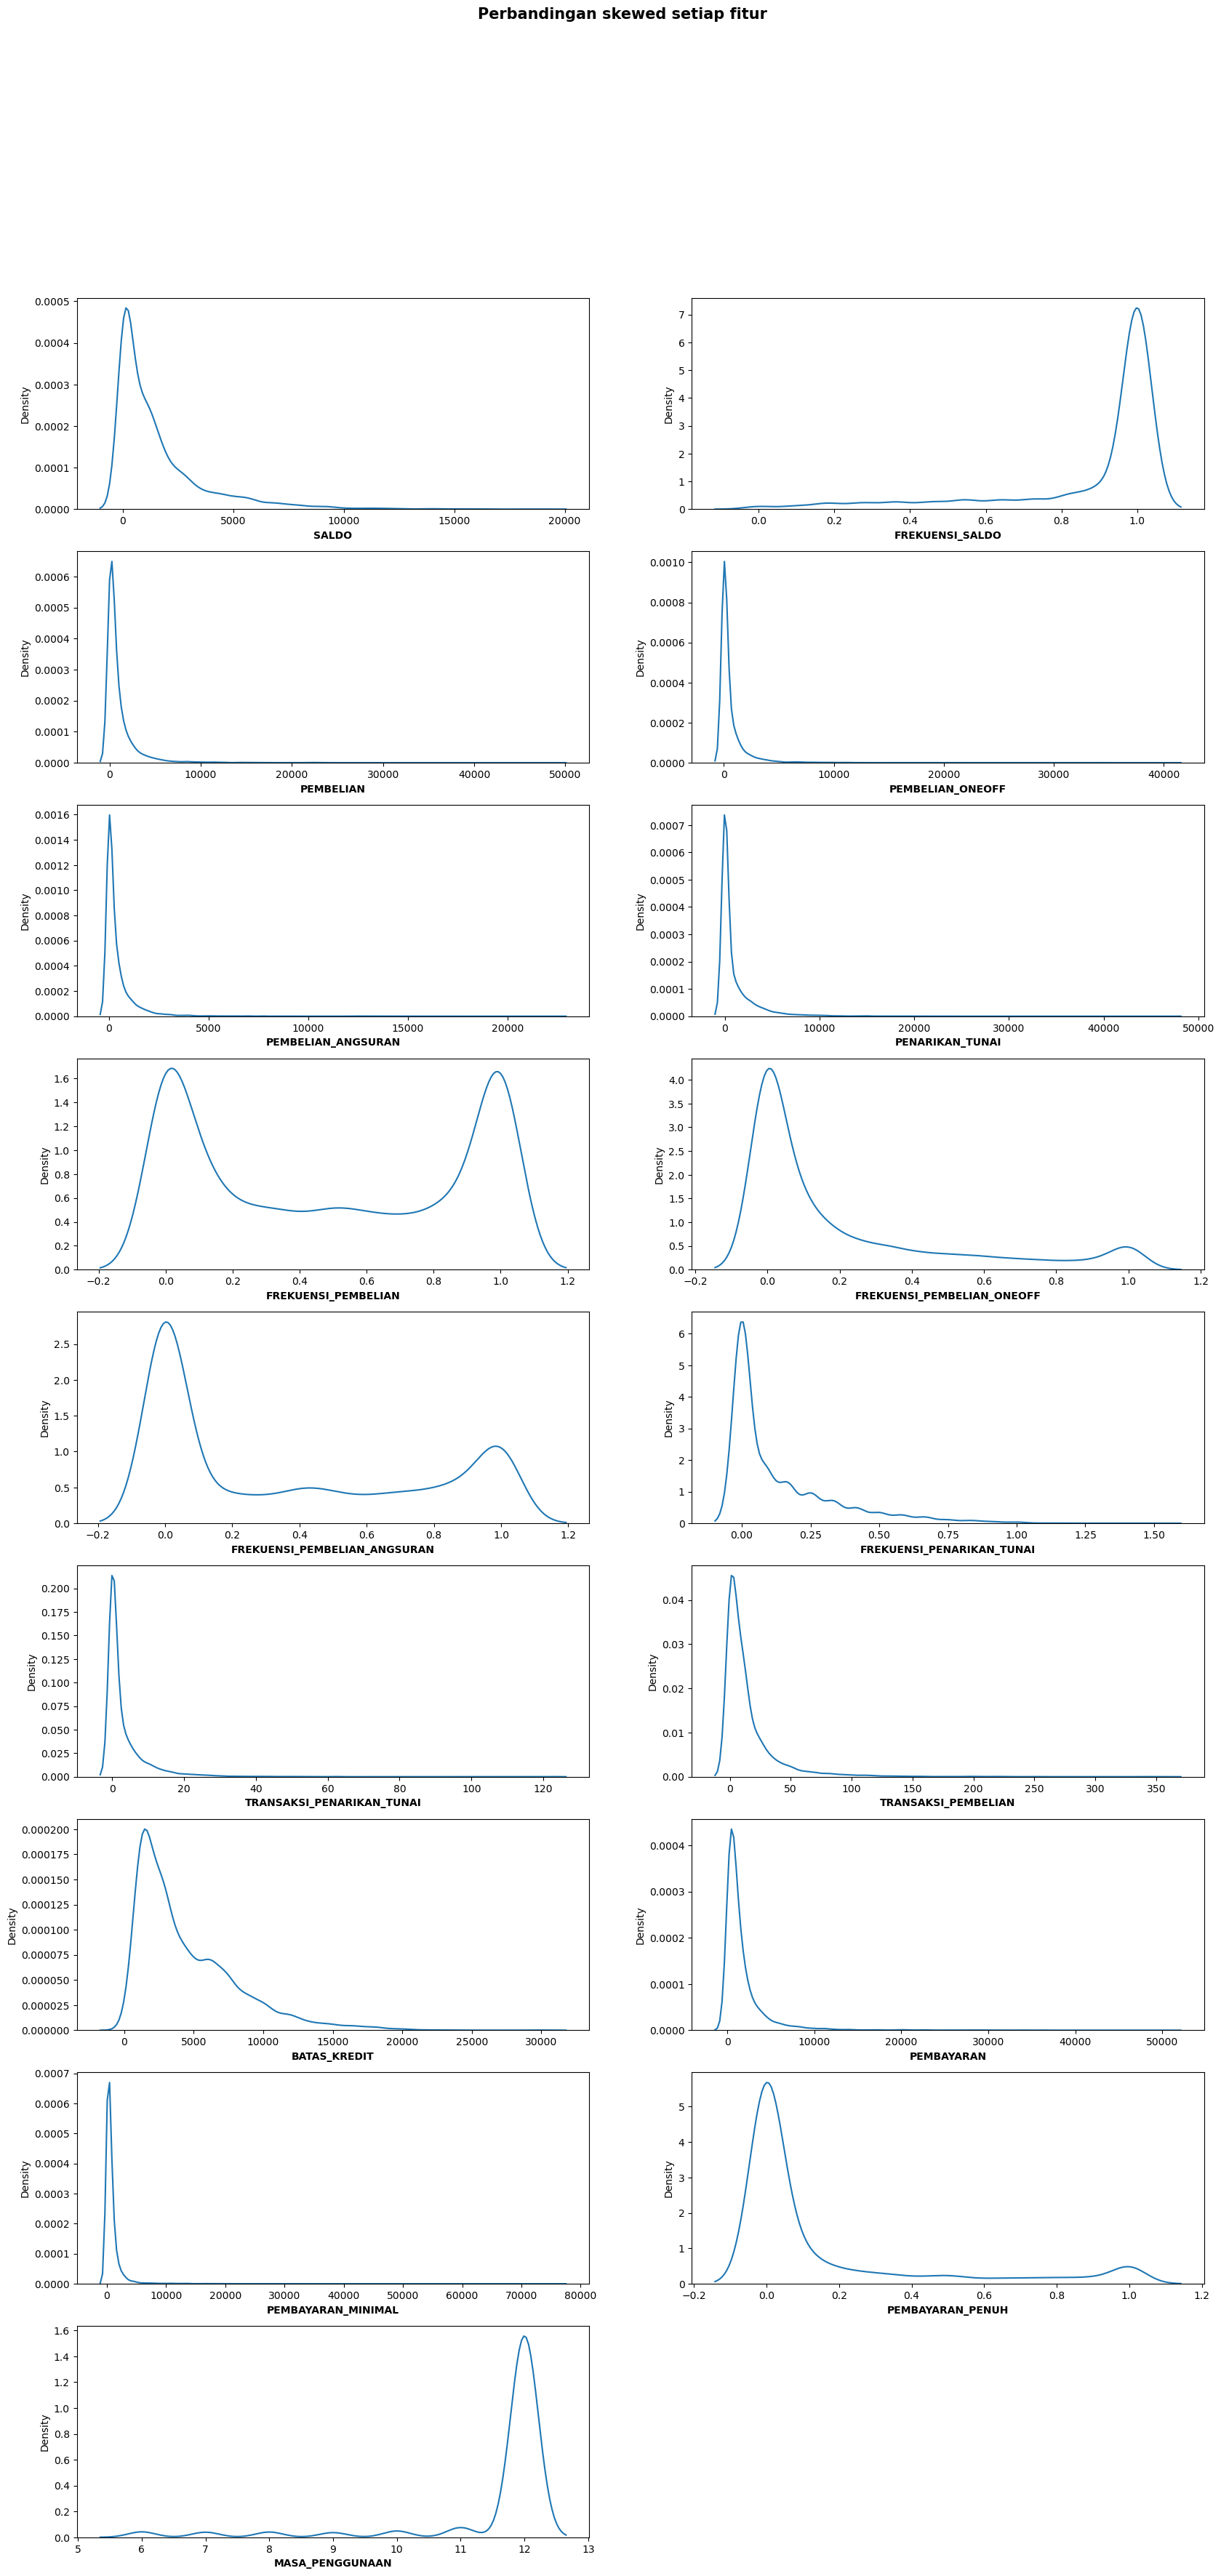

In [20]:
# Perbandingan skewed setiap fitur
plt.figure(figsize=(20,40))
plt.suptitle('Perbandingan skewed setiap fitur', fontweight='bold', fontsize=15)
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col, fontsize=10, fontweight='bold')

plt.show()

In [21]:
df.skew()

SALDO                            2.393386
FREKUENSI_SALDO                 -2.023266
PEMBELIAN                        8.144269
PEMBELIAN_ONEOFF                10.045083
PEMBELIAN_ANGSURAN               7.299120
PENARIKAN_TUNAI                  5.166609
FREKUENSI_PEMBELIAN              0.060164
FREKUENSI_PEMBELIAN_ONEOFF       1.535613
FREKUENSI_PEMBELIAN_ANGSURAN     0.509201
FREKUENSI_PENARIKAN_TUNAI        1.828686
TRANSAKSI_PENARIKAN_TUNAI        5.721298
TRANSAKSI_PEMBELIAN              4.630655
BATAS_KREDIT                     1.522549
PEMBAYARAN                       5.907620
PEMBAYARAN_MINIMAL              13.867357
PEMBAYARAN_PENUH                 1.942820
MASA_PENGGUNAAN                 -2.943017
dtype: float64

Terdapat banyak skewness yang sangat bervariasi, tetapi mayoritas berdistribusi left skewed. Skewness bervariasi dikarenakan ada beberapa pelanggan yang melakukan transaksi dalam jumlah yang sangat tinggi.

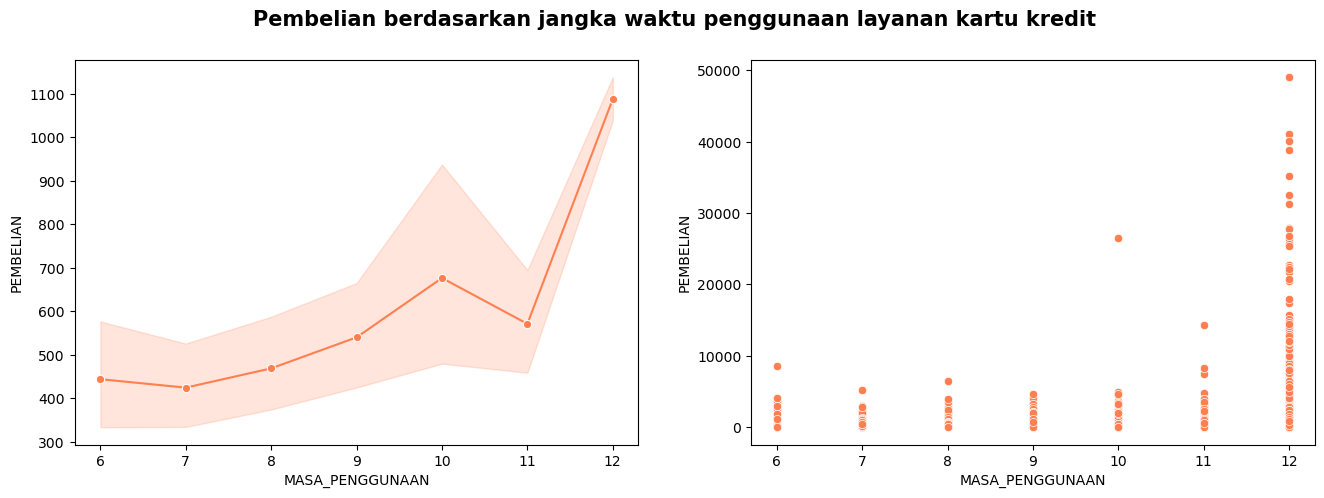

In [22]:
# Pembelian berdasarkan jangka waktu penggunaan layanan kartu kredit
plt.figure(figsize=(16,5))
plt.suptitle('Pembelian berdasarkan jangka waktu penggunaan layanan kartu kredit', fontweight='bold', fontsize=15)

# Line plot
plt.subplot(1,2,1)
sns.lineplot(x='MASA_PENGGUNAAN', y='PEMBELIAN', data=df, color='coral', marker="o")

# Scatter plot
plt.subplot(1,2,2)
sns.scatterplot(x='MASA_PENGGUNAAN', y='PEMBELIAN', data=df, color='coral');

Berdasarkan visualisasi, dapat dilihat bahwa:
- Jumlah pembelian meningkat berdasarkan masa berlaku penggunaan layanan kartu, tetapi sempat menurun pada masa berlaku 11 bulan
- Jumlah pembelian tertinggi terdapat pada masa berlaku penggunaan layanan kartu kredit selama 12 bulan

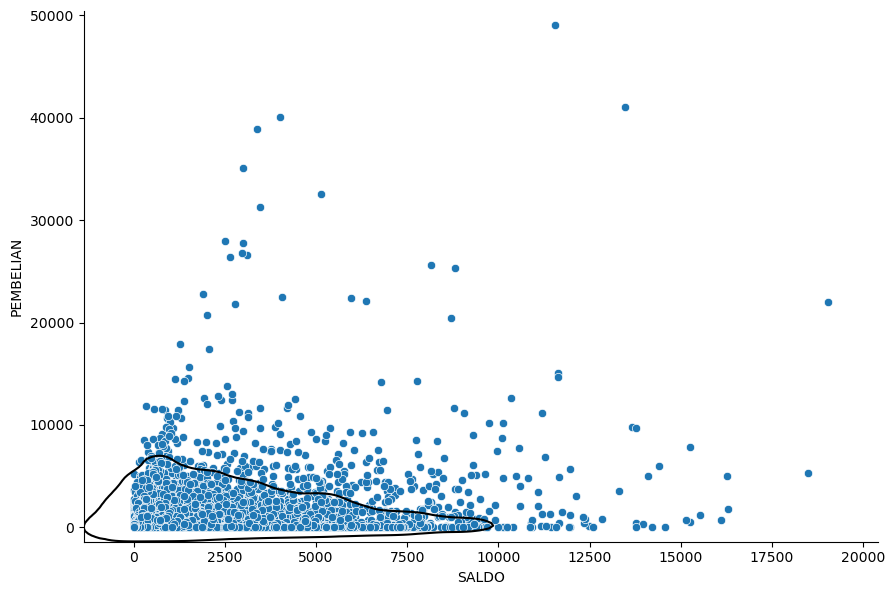

In [23]:
# persebaran pembelian yang dilakukan berdasarkan saldo pelanggan
sns.pairplot(data=df, x_vars='SALDO', y_vars='PEMBELIAN',
             height=6, aspect=1.5).map(sns.kdeplot, levels=1, color='black');

Berdasarkan visualisasi diatas, pada plot dapat dilihat bahwa sebagian besar pengguna yang tersebar telah melakukan pembelian dibawah 8.000 dan saldo yang tersisa di akun mereka untuk melakukan pembelian yaitu dibawah 10.000.

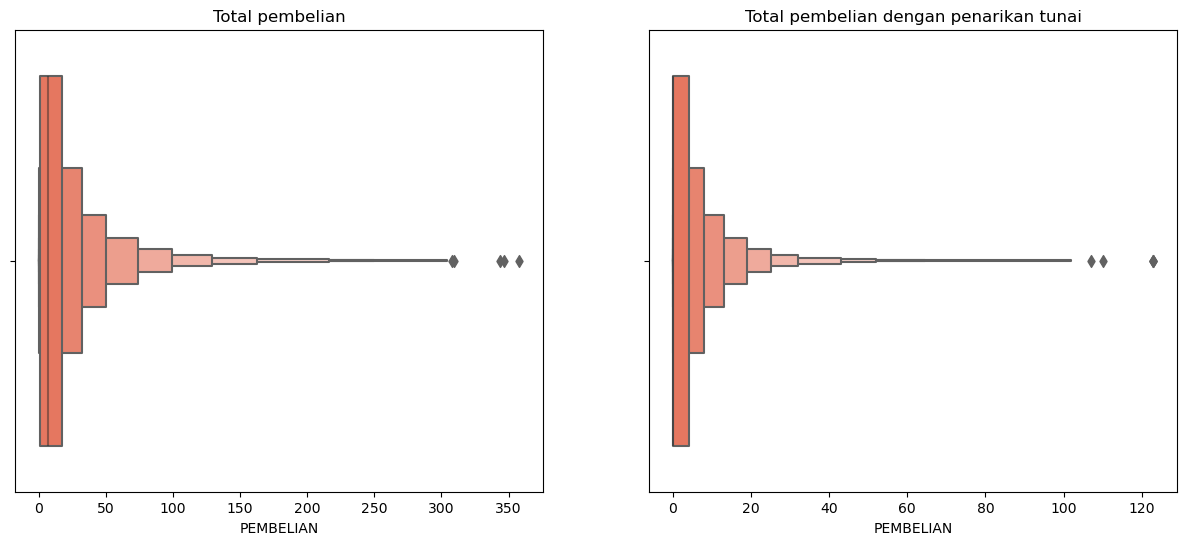

In [24]:
# frekuensi pembelian yang dilakukan dengan menggunakan penarikan tunai
plt.rcParams['figure.figsize'] = (15,6)

plt.subplot(1,2,1)
sns.boxenplot(df['TRANSAKSI_PEMBELIAN'], palette='Reds')
plt.title('Total pembelian')
plt.xlabel('PEMBELIAN')

plt.subplot(1,2,2)
sns.boxenplot(df['TRANSAKSI_PENARIKAN_TUNAI'], palette='Reds')
plt.title('Total pembelian dengan penarikan tunai')
plt.xlabel('PEMBELIAN');

Berdasarkan visualisasi boxen plot diatas, dapat diketahui bahwa:

Sebagian besar pelanggan memiliki jumlah transaksi yang rendah dan hanya ada beberapa pelanggan yang membeli dengan kuantitas tinggi. Hal tersebut dapat diasumsikan bahwa orang menggunakan kartu kredit untuk pemanfaatan kredit dan bukan untuk pembelian.
Beberapa pelanggan membeli lebih dari 300 kali, akan tetapi pembelian dengan uang muka yang lebih dari 100 kali hanya sedikit.

## 5.2 Analisis Korelasi

Analisis korelasi merupakan salah satu teknik statistik yang digunakan untuk menganalisis hubungan antara dua variabel atau lebih yang bersifat kuantitatif. Bahwa adanya perubahan sebuah variabel disebabkan atau akan diikuti dengan perubahan variabel lain.

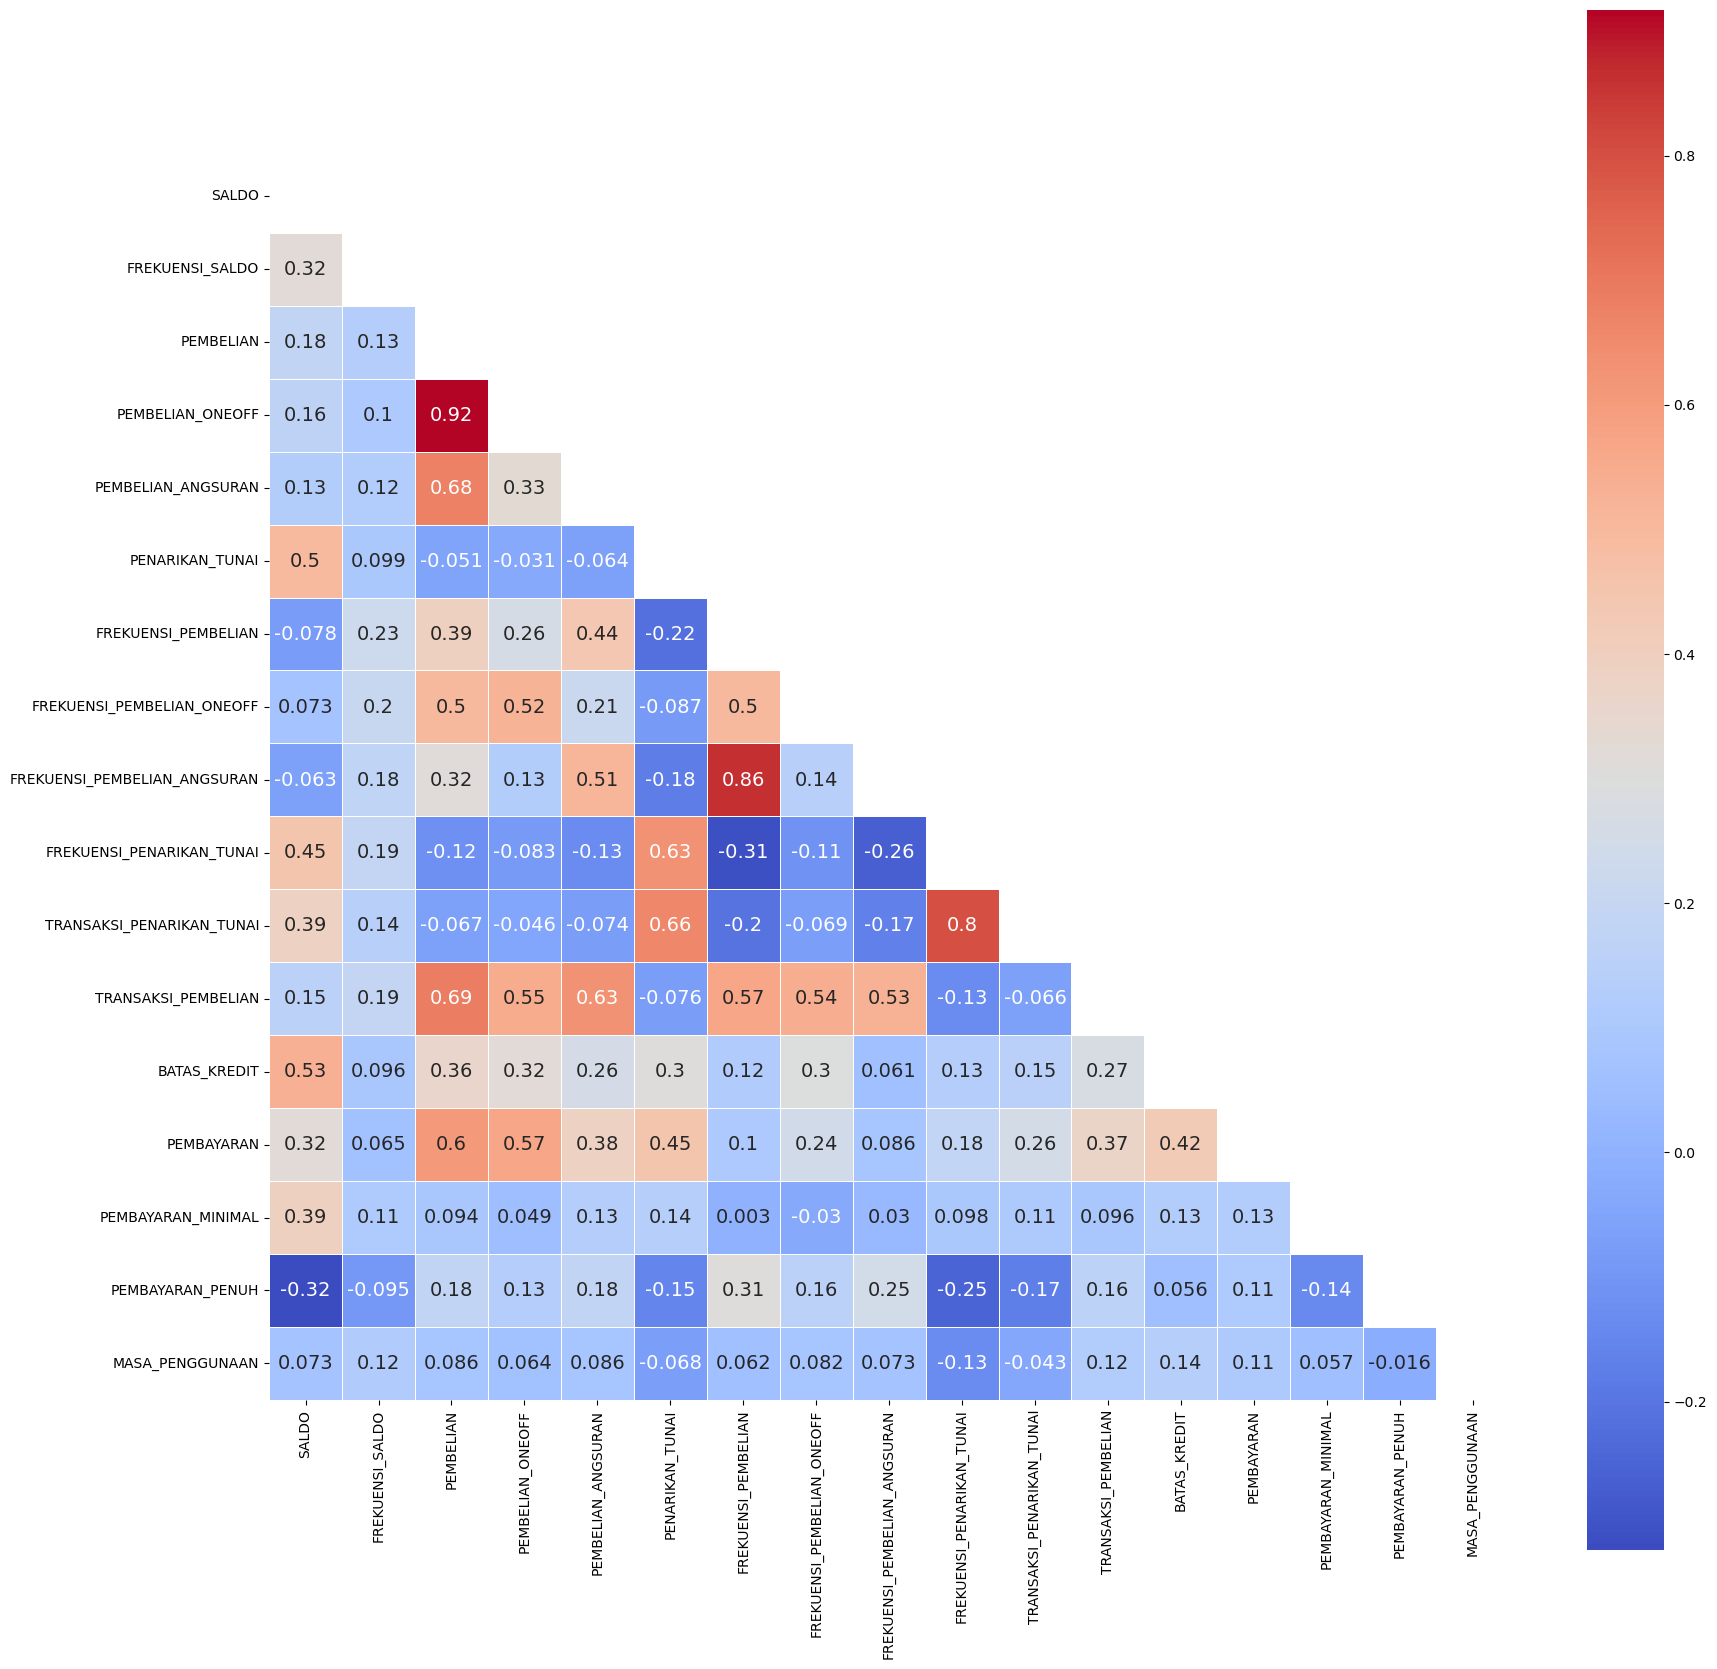

In [25]:
correlation = df.corr(method='pearson')

fig, ax = plt.subplots()
ax.figure.set_size_inches(20, 20)

# Membuat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# Membuat heatmap
sns.heatmap(correlation, cmap='coolwarm', mask=mask, square=True, linewidths=.5,
            annot=True, annot_kws={'size':14});

plt.show()

Berdasarkan visualisasi heatmap diatas, diketahui bahwa korelasi antar fitur sebagai berikut:

- Korelasi sangat kuat: <br>
Pembelian_Oneoff dan Pembelian dengan nilai korelasi 0.92. Hal tersebut karena pembelian satu kali merupakan bagian dari pembelian.
Frekuensi_Pembelian_angsuran dan Frekuensi_Pembelian dengan nilai korelasi 0,8. Hal tersebut menunjukkan bahwa pembayaran di muka sering terjadi.
Transaksi_Penarikan_Tunai dan Penarikan_Tunai dengan nilai korelasi 0,73. Hal tersebut dapat diartikan bahwa pembayaran dengan metode cicilan sering terjadi.
- Korelasi sedang: <br>
Transaksi_Pembelian dan Pembelian dengan nilai korelasi 0.69. Hal tersebut menunjukkan bahwa total pembelian terdiri dari banyak transaksi pembelian.
Pembelian_Angsuran dan Pembelian dengan nilai korelasi 0.68 . Hal tersebut karena pembelian secara mencicil adalah bagian dari pembelian.
Transaksi_Penarikan_Tunai dan Penarikan_Tunai dengan nilai korelasi 0.66. Hal tersebut menunjukkan bahwa pembayaran di muka terdiri dari banyak transaksi pembayaran uang muka.

## 5.3 Deteksi Outlier

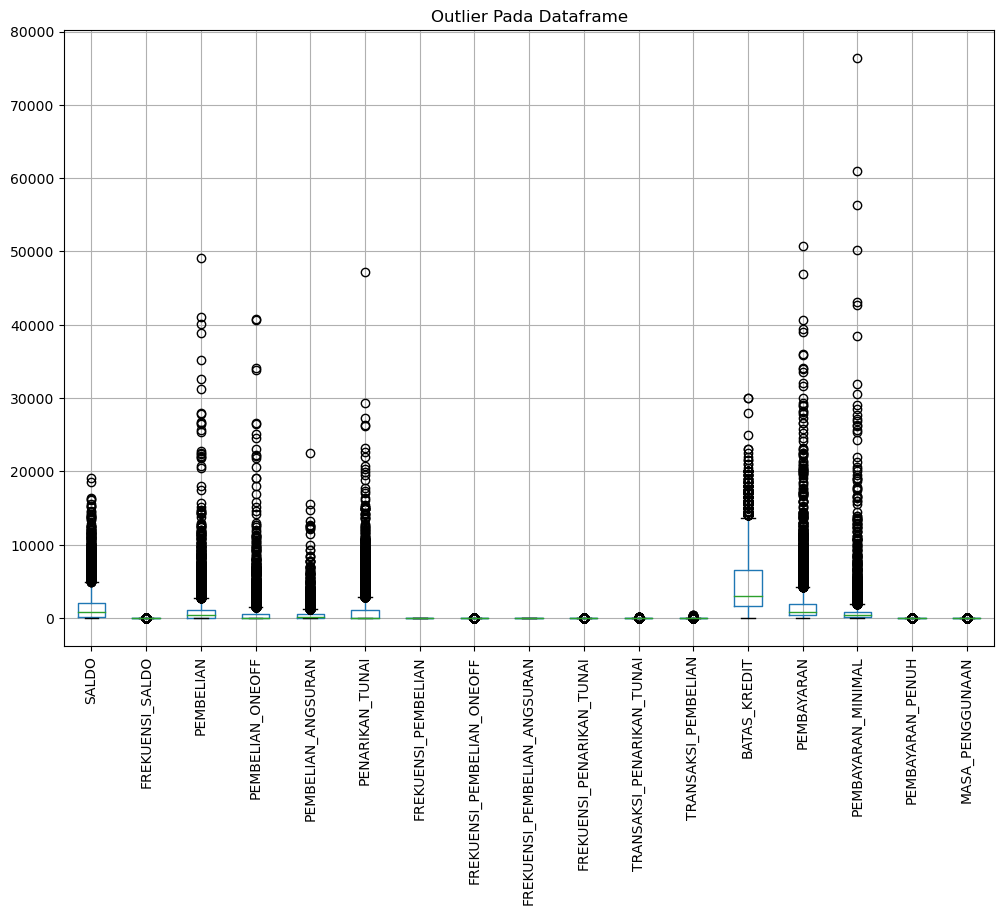

In [26]:
# Mendeteksi outlier
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Outlier Pada Dataframe')
plt.xticks(rotation=90)
plt.show()

Dataframe ini memiliki sangat banyak outlier.

In [27]:
df.shape

(8950, 17)

**Menghapus outlier menggunakan metode IQR (Interquartile Range)**

In [28]:
# Menghitung nilai kuartil pertama (Q1) dan kuartil ketiga (Q3)
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

# Menghitung rentang IQR (Interquartile Range)
iqr = q3 - q1

# Menentukan batas ambang untuk outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifikasi data yang di luar batas ambang sebagai outlier
outlier = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

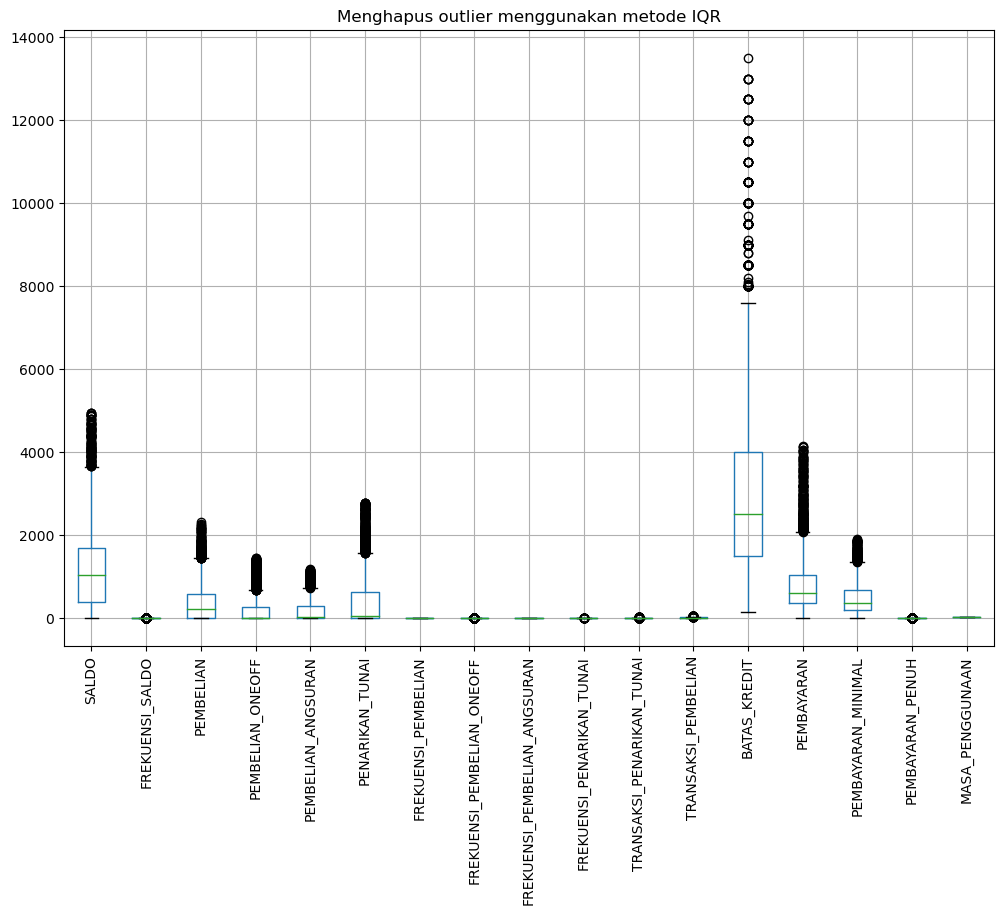

In [29]:
plt.figure(figsize=(12, 8))
outlier.boxplot()
plt.title('Menghapus outlier menggunakan metode IQR')
plt.xticks(rotation=90)
plt.show()

In [30]:
print("Data frame Sebelum Outlier di hapus : ", df.shape)
print("Data frame Sesudah Outlier di hapus: ", outlier.shape)

Data frame Sebelum Outlier di hapus :  (8950, 17)
Data frame Sesudah Outlier di hapus:  (3008, 17)


In [31]:
# Jumlah baris sebelum outlier dihapus
jumlah_sebelum = 8950

# Jumlah baris sesudah outlier dihapus
jumlah_sesudah = 3008

# Selisih jumlah baris
selisih = jumlah_sebelum - jumlah_sesudah
persentase_terhapus = ((jumlah_sebelum - jumlah_sesudah) / jumlah_sebelum) * 100

print(f"Selisih jumlah baris: {selisih}")
print(f"Persentase data yang terhapus: {persentase_terhapus:.2f}%")

Selisih jumlah baris: 5942
Persentase data yang terhapus: 66.39%


**Menghapus outlier menggunakan metode Z-score**

In [32]:
# Menghitung Z-score untuk setiap kolom
z_scores = df.apply(lambda x: (x - x.mean()) / x.std())

# Menentukan ambang batas Z-score untuk mengidentifikasi outlier
z_score_threshold = 3

# Mengidentifikasi outlier berdasarkan Z-score
outliers = df[z_scores.abs() > z_score_threshold]

# Menghapus outlier
dfbaru = df[(np.abs(z_scores) <= z_score_threshold).all(axis=1)]

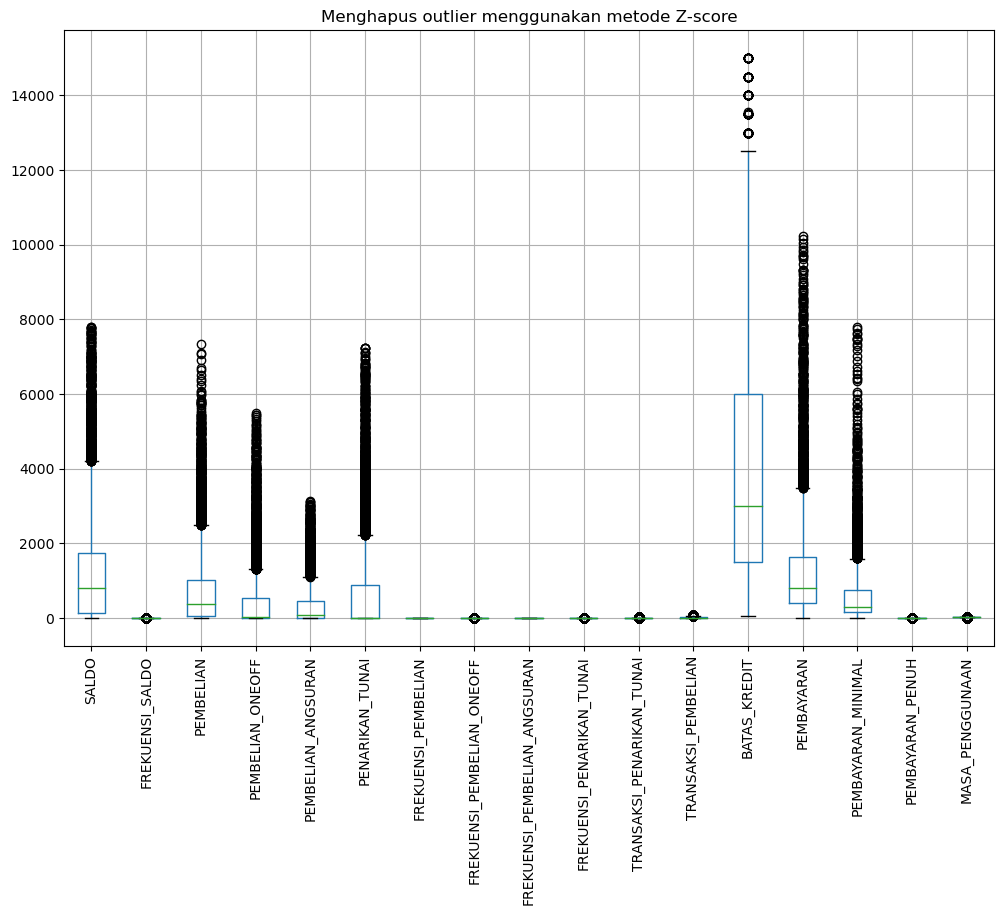

In [33]:
plt.figure(figsize=(12, 8))
dfbaru.boxplot()
plt.title('Menghapus outlier menggunakan metode Z-score')
plt.xticks(rotation=90)
plt.show()

In [34]:
print("Data frame Sebelum Outlier di hapus : ", df.shape)
print("Data frame Sesudah Outlier di hapus: ", dfbaru.shape)

Data frame Sebelum Outlier di hapus :  (8950, 17)
Data frame Sesudah Outlier di hapus:  (7434, 17)


In [35]:
# Jumlah baris sebelum outlier dihapus
jumlah_sebelum = 8950

# Jumlah baris sesudah outlier dihapus
jumlah_sesudah = 7434

# Selisih jumlah baris
selisih = jumlah_sebelum - jumlah_sesudah
persentase_terhapus = ((jumlah_sebelum - jumlah_sesudah) / jumlah_sebelum) * 100

print(f"Selisih jumlah baris: {selisih}")
print(f"Persentase data yang terhapus: {persentase_terhapus:.2f}%")

Selisih jumlah baris: 1516
Persentase data yang terhapus: 16.94%


Dikarekanan presentase zscore lebih sedikit maka kita akan menggunakan metode ini.

## 5.3 Central Tendency & Measure of Spread
- Central Tendency merupakan nilai yang menunjukkan titik tengah dari suatu dataset untuk mengetahui dimana posisi banyak nilai data berkumpul di dalam distribusi. Nilai Mean, Median, dan Modus adalah ukuran Central Tendency yang paling umum digunakan.
- Measures of Spread didefinisikan sebagai cara untuk mendeskripsikan data dengan menjelaskan seberapa menyebar data kita. Cara yang sering digunakan adalah range, varian, dan standar deviasi. <br>

Pada project ini, kami menggunakan kolom yang sudah dipilih dengan tipe data float untuk dicari central tendency dan Measure of Spread nya.

In [36]:
df_ct_mos = df.loc[:,['SALDO', 'PEMBELIAN', 'PEMBELIAN_ONEOFF', 'PEMBELIAN_ANGSURAN', 'PENARIKAN_TUNAI', 'FREKUENSI_PENARIKAN_TUNAI', 'PEMBAYARAN', 'PEMBAYARAN_MINIMAL', 'PEMBAYARAN_PENUH']]
df_ct_mos.head()

,SALDO,PEMBELIAN,PEMBELIAN_ONEOFF,PEMBELIAN_ANGSURAN,PENARIKAN_TUNAI,FREKUENSI_PENARIKAN_TUNAI,PEMBAYARAN,PEMBAYARAN_MINIMAL,PEMBAYARAN_PENUH
0,40.900749,95.40,0.00,95.4,0.000000,0.000000,201.802084,139.509787,0.000000
1,3202.467416,0.00,0.00,0.0,6442.945483,0.250000,4103.032597,1072.340217,0.222222
2,2495.148862,773.17,773.17,0.0,0.000000,0.000000,622.066742,627.284787,0.000000
3,1666.670542,1499.00,1499.00,0.0,205.788017,0.083333,0.000000,864.206542,0.000000
4,817.714335,16.00,16.00,0.0,0.000000,0.000000,678.334763,244.791237,0.000000


In [37]:
#Menghitung mean, median, modus, range, variansi, dan Standard Deviasi
for column in df_ct_mos:
    mean = df_ct_mos[column].mean()
    median = df_ct_mos[column].median()
    mode = df_ct_mos[column].mode()[0]
    min_value = df_ct_mos[column].min()
    max_value = df_ct_mos[column].max()
    range_value = max_value - min_value
    variance = df_ct_mos[column].var()
    std_dev = df_ct_mos[column].std()

#Print hasilnya
    print(f"Nama Kolom: {column}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {mode:.3f}")
    print(f"Range: {range_value:.3f}")
    print(f"Variansi: {variance:.3f}")
    print(f"Standard Deviasi: {std_dev:.3f}")
    print("  ")

Nama Kolom: SALDO
Mean: 1564.475
Median: 873.385
Modus: 0.000
Range: 19043.139
Variansi: 4332774.965
Standard Deviasi: 2081.532
  
Nama Kolom: PEMBELIAN
Mean: 1003.205
Median: 361.280
Modus: 0.000
Range: 49039.570
Variansi: 4565208.191
Standard Deviasi: 2136.635
  
Nama Kolom: PEMBELIAN_ONEOFF
Mean: 592.437
Median: 38.000
Modus: 0.000
Range: 40761.250
Variansi: 2755227.898
Standard Deviasi: 1659.888
  
Nama Kolom: PEMBELIAN_ANGSURAN
Mean: 411.068
Median: 89.000
Modus: 0.000
Range: 22500.000
Variansi: 817827.427
Standard Deviasi: 904.338
  
Nama Kolom: PENARIKAN_TUNAI
Mean: 978.871
Median: 0.000
Modus: 0.000
Range: 47137.212
Variansi: 4398096.325
Standard Deviasi: 2097.164
  
Nama Kolom: FREKUENSI_PENARIKAN_TUNAI
Mean: 0.135
Median: 0.000
Modus: 0.000
Range: 1.500
Variansi: 0.040
Standard Deviasi: 0.200
  
Nama Kolom: PEMBAYARAN
Mean: 1733.144
Median: 856.902
Modus: 0.000
Range: 50721.483
Variansi: 8381394.157
Standard Deviasi: 2895.064
  
Nama Kolom: PEMBAYARAN_MINIMAL
Mean: 864.207
Me

## 5.4 Cardinality

Cardinality / Kardinalitas adalah ukuran keunikan data pada kolom tertentu dari suatu table database. Tujuan kita adalah mengurangi cardinality untuk membuat model yang lebih konsisten dan tidak over-fit. Kita memastikan semua label unik yang ada pernah dilihat model saat training.

In [38]:
print("Number of categories in the variable is:")
df[df.columns].nunique()

Number of categories in the variable is:


SALDO                           8871
FREKUENSI_SALDO                   43
PEMBELIAN                       6203
PEMBELIAN_ONEOFF                4014
PEMBELIAN_ANGSURAN              4452
PENARIKAN_TUNAI                 4323
FREKUENSI_PEMBELIAN               47
FREKUENSI_PEMBELIAN_ONEOFF        47
FREKUENSI_PEMBELIAN_ANGSURAN      47
FREKUENSI_PENARIKAN_TUNAI         54
TRANSAKSI_PENARIKAN_TUNAI         65
TRANSAKSI_PEMBELIAN              173
BATAS_KREDIT                     206
PEMBAYARAN                      8711
PEMBAYARAN_MINIMAL              8637
PEMBAYARAN_PENUH                  47
MASA_PENGGUNAAN                    7
dtype: int64

Dapat dilihat bahwa number of categories (unique value) dari berbagai fitur sangat banyak atau biasa disebut dengan istilah high cardinality. Akan tetapi, tidak dapat dilakukan reduced cardinality walaupun termasuk kedalam high cardinality. Hal tersebut karena pelanggan yang melakukan transaksi sangat bervariasi.

# 6. DATA PREPROCESSING


## 6.1 Melakukan Standarisasi Pada Data

Teknik untuk membuat skala data setiap fitur menjadi sama. Pada project ini, kami menggunakan standar Scaler yang melakukan transform feature dengan mengubah setiap data ke range tertentu antara 0-1.

In [39]:
scaler = StandardScaler()
scaled = scaler.fit_transform(dfbaru)

print("Data asli:")
print(dfbaru.shape)
print("\nData setelah di-scaling:")
print(scaled.shape)

Data asli:
(7434, 17)

Data setelah di-scaling:
(7434, 17)


In [40]:
# Statistics of scaled data
scaled_data = pd.DataFrame(scaled, columns=dfbaru.columns)
scaled_data.head()

,SALDO,FREKUENSI_SALDO,PEMBELIAN,PEMBELIAN_ONEOFF,PEMBELIAN_ANGSURAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_ONEOFF,FREKUENSI_PEMBELIAN_ANGSURAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMAL,PEMBAYARAN_PENUH,MASA_PENGGUNAAN
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187


# 7. PENDEFINISAN MODEL

## 7.1 K-Means Clustering

Metode klasterisasi pertama yang akan digunakan yaitu adalah K-Means. K-Means dalah algoritma unsupervised learning yang mengelompokkan dataset yang belum dilabel ke dalam kluster yang berbeda berdasarkan kesamaan tertentu. Kita akan melihat jumlah clusters yang opttimal degan menggunakan elbow method

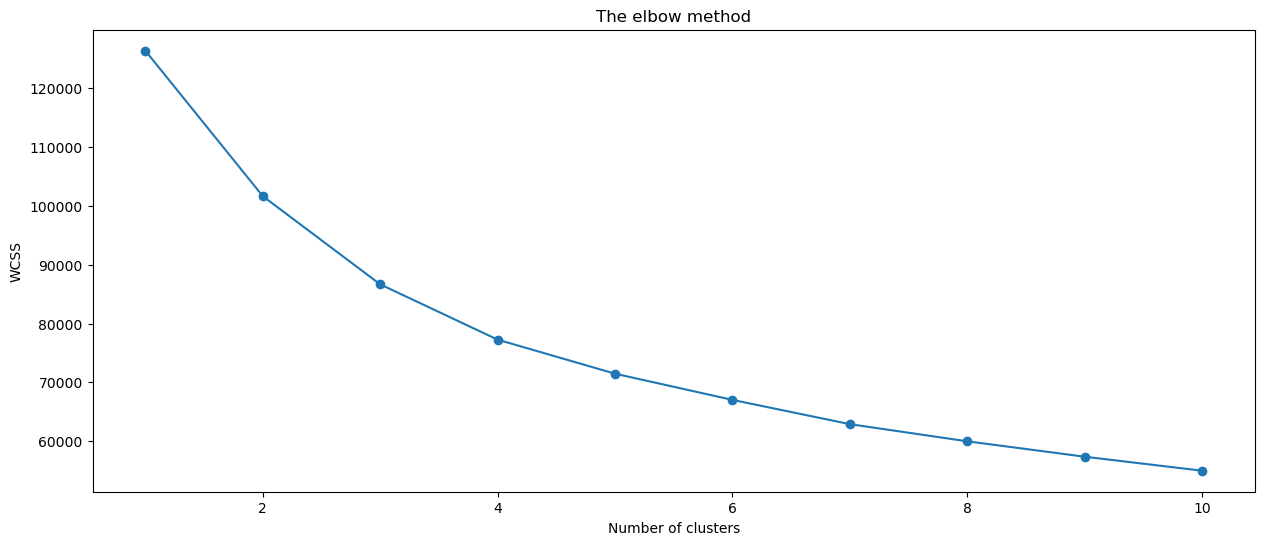

In [41]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(2, 8):
    km = KMeans(n_clusters=i, random_state=0)
    labels = km.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print("Silhouette score for", i, "clusters:", score)

Silhouette score for 2 clusters: 0.2055393147491899
Silhouette score for 3 clusters: 0.20708085338573082
Silhouette score for 4 clusters: 0.18385748758009138
Silhouette score for 5 clusters: 0.1841670560615259
Silhouette score for 6 clusters: 0.19055443616252815
Silhouette score for 7 clusters: 0.19864716042692077


Dikarenakan yang tertinggi 3 kita akan memakai 3 cluster.

In [43]:
x = scaled_data.values
km = KMeans(n_clusters=3, random_state=42)
y_km = km.fit_predict(x)

In [44]:
y_km

array([2, 0, 1, ..., 2, 2, 2])

In [45]:
df_kmean= scaled_data.copy()
df_kmean['KMeansSegment']= km.labels_

In [46]:
df_kmean

,SALDO,FREKUENSI_SALDO,PEMBELIAN,PEMBELIAN_ONEOFF,PEMBELIAN_ANGSURAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_ONEOFF,FREKUENSI_PEMBELIAN_ANGSURAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMAL,PEMBAYARAN_PENUH,MASA_PENGGUNAAN,KMeansSegment
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187,2
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187,0
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187,1
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187,2
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,-0.756687,-0.654440,-0.358761,-0.057990,-0.636612,-0.406721,0.035966,1.069739,-0.910579,0.096509,0.173950,-0.334531,-1.192081,-0.834962,-0.610734,-0.531523,-4.697636,2
7430,-0.800266,-0.068638,-0.575218,-0.543505,-0.313852,-0.543984,0.982164,-0.668791,0.999753,-0.690806,-0.587319,-0.334531,-1.021765,-0.859750,-0.616355,-0.531523,-4.697636,2
7431,-0.263862,-0.654440,-0.734487,-0.543505,-0.636612,0.390178,-1.225631,-0.668791,-0.910579,0.096509,0.173950,-0.797517,-0.953638,-0.798391,-0.322151,-0.531523,-4.697636,2
7432,-0.745849,0.517164,-0.304400,-0.543505,0.234966,-0.543984,0.666765,-0.668791,0.681364,-0.690806,-0.587319,-0.400671,-1.021765,-0.785516,-0.596957,-0.531523,-4.697636,2


In [47]:
df_kmean['Labels'] = df_kmean['KMeansSegment'].map({0:'limit kredit pengguna rendah & Pengguna jarang memperbaharui isi saldo',
                                                    1:'limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo',
                                                    2:'limit kredit pengguna pengguna tinggi & pengguna sering memperbaharui isi saldo'})
df_kmean.head()

,SALDO,FREKUENSI_SALDO,PEMBELIAN,PEMBELIAN_ONEOFF,PEMBELIAN_ANGSURAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_ONEOFF,FREKUENSI_PEMBELIAN_ANGSURAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMAL,PEMBAYARAN_PENUH,MASA_PENGGUNAAN,KMeansSegment,Labels
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187,2,limit kredit pengguna pengguna tinggi & penggu...
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187,0,limit kredit pengguna rendah & Pengguna jarang...
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187,1,limit kredit pengguna rata-rata & pengguna cuk...
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187,2,limit kredit pengguna pengguna tinggi & penggu...
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187,2,limit kredit pengguna pengguna tinggi & penggu...


In [48]:
# Melihat persentase dari masing-masing klaster
clust = pd.DataFrame({"Klaster":(df_kmean['Labels'].unique()),
                        "Percent":(df_kmean['Labels'].value_counts()/df_kmean.shape[0])*100}).reset_index()

In [49]:
clust.drop(['index'],axis=1)

,Klaster,Percent
0,limit kredit pengguna pengguna tinggi & penggu...,56.241593
1,limit kredit pengguna rendah & Pengguna jarang...,24.092010
2,limit kredit pengguna rata-rata & pengguna cuk...,19.666398


# 8. PELATIHAN MODEL


Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.


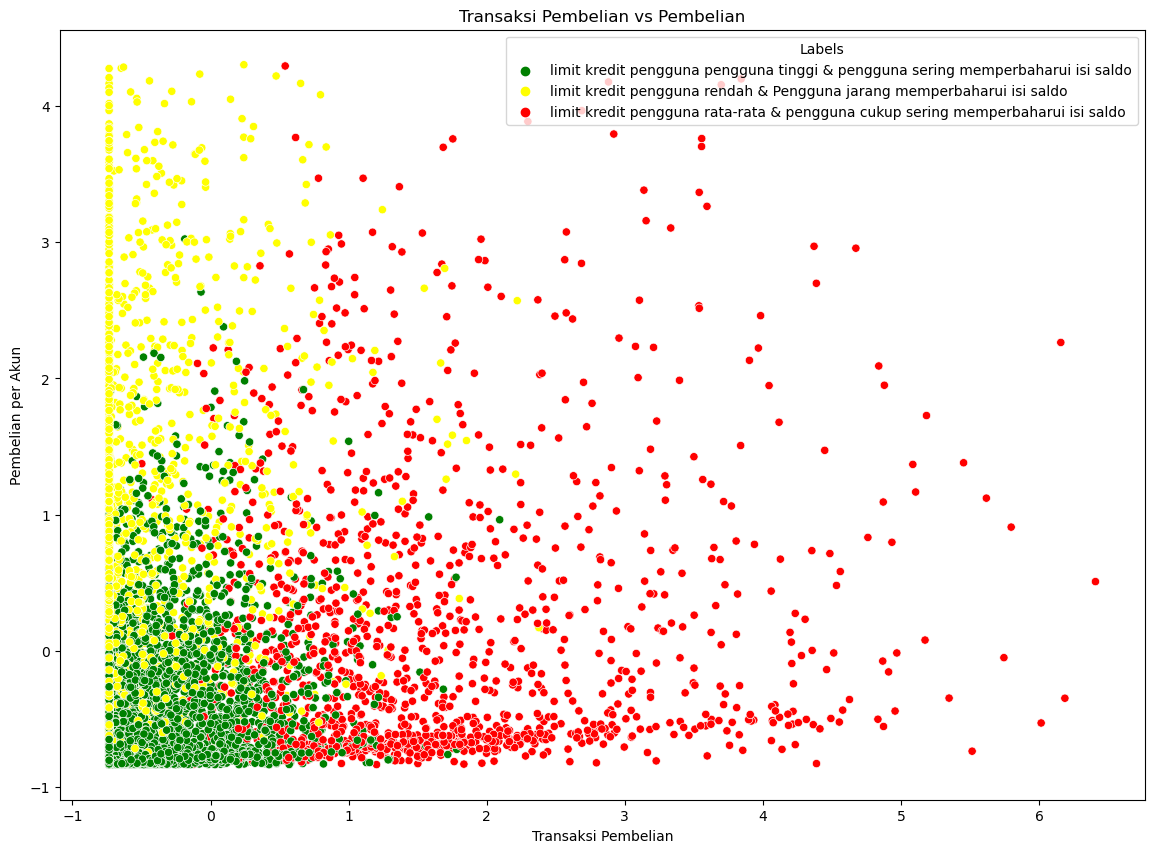

<Figure size 1500x600 with 0 Axes>

In [50]:
plt.figure(figsize=(14, 10))
X = df_kmean['PEMBELIAN']
Y = df_kmean['SALDO']
g = sns.scatterplot(x=X, y=Y, hue=df_kmean['Labels'], palette=['green', 'yellow', 'red'])
g.set_xlabel('Transaksi Pembelian')
g.set_ylabel('Pembelian per Akun')
g.set_title('Transaksi Pembelian vs Pembelian')
plt.show()

plt.savefig("Transaksi Pembelian vs Pembelian KMeans.png",
            bbox_inches="tight",
            pad_inches=1,
            transparent=True,
            orientation='landscape')

- Kuning (Cluster 0) : limit kredit pengguna rendah & Pengguna jarang memperbaharui isi saldo.
- Merah (Cluester 1) : limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo,
- Hijau (Cluester 2) : limit kredit pengguna pengguna tinggi & pengguna sering memperbaharui isi saldo

## 8. 1 Principal Component Analysis

PCA adalah singkatan dari Principal Component Analysis. PCA adalah suatu teknik analisis statistik multivariat yang digunakan untuk menyederhanakan suatu data dengan cara mentransformasi data secara linier sehingga terbentuk sistem koordinat baru dengan varians maksimum

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_scaled = pca.fit(scaled)

In [52]:
pc_columns = ['PC'+str(n) for n in range(1, len(pca_scaled.components_)+1)]
df_pca = pd.DataFrame(pca_scaled.transform(scaled), columns=pc_columns)

In [53]:
df_pca['KMeansSegment']= km.labels_
df_pca

,PC1,PC2,KMeansSegment
0,-1.325625,-2.046626,2
1,-2.781074,3.311279,0
2,1.237429,0.544760,1
3,-0.606674,-0.007237,2
4,-1.448065,-1.469047,2
...,...,...,...
7429,-0.978992,-1.327685,2
7430,-0.191682,-2.221450,2
7431,-2.574731,-1.140534,2
7432,-0.116639,-1.954584,2


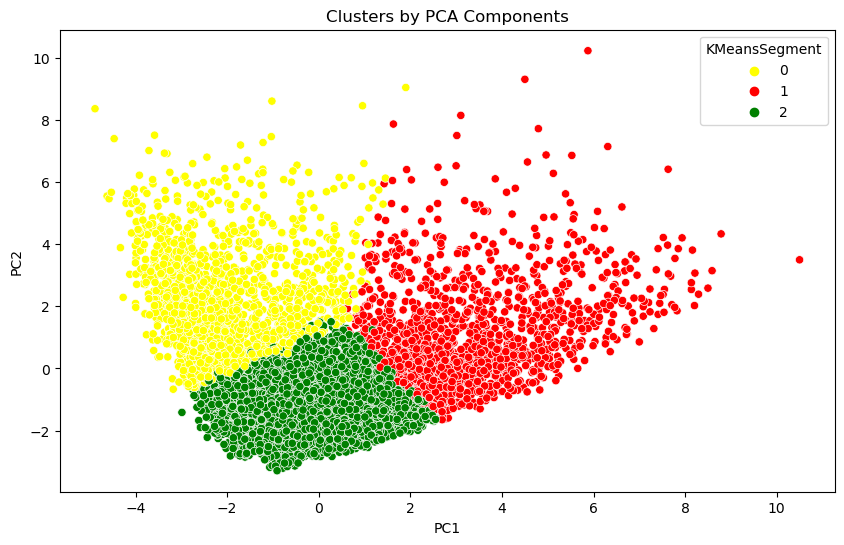

In [54]:
x_axis = df_pca['PC1']
y_axis = df_pca['PC2']
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca['KMeansSegment'], palette=['yellow','red','green'])
plt.title('Clusters by PCA Components')
plt.show()

Setelah melalui beberapa analisis dan teknik pemrosesan, data yang digunakan dapat dikelompokkan menjadi 3 clustering, dimana ketiga cluster tersebut memiliki kriteria yang berbeda, yaitu:
- Kuning (Cluster 0) : limit kredit pengguna rendah & Pengguna jarang memperbaharui isi saldo.
- Merah (Cluester 1) : limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo,
- Hijau (Cluester 2) : limit kredit pengguna pengguna tinggi & pengguna sering memperbaharui isi saldo

# 9. EVALUASI MODEL

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model

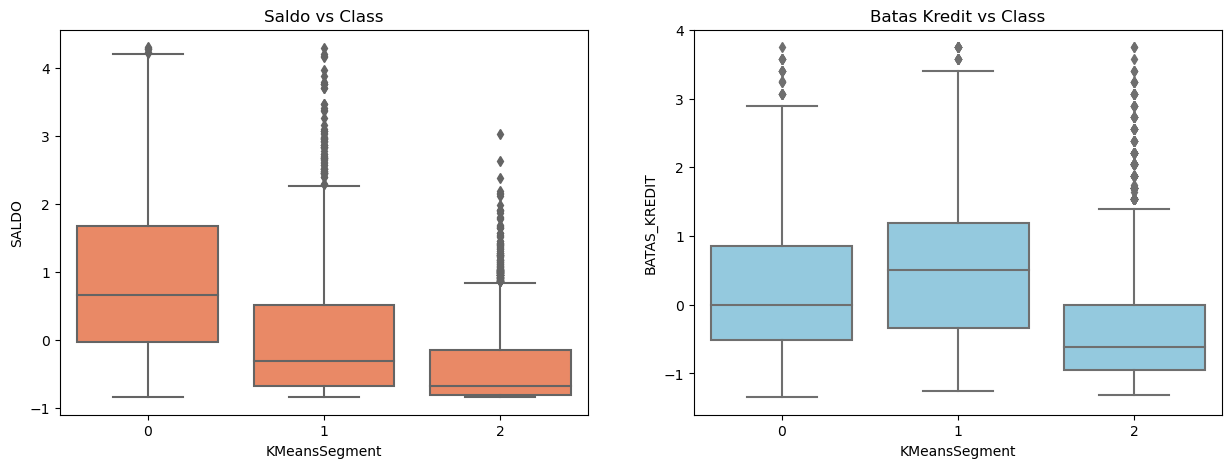

In [55]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = "KMeansSegment", y = "SALDO", data  = df_kmean, color = "coral");
plt.title("Saldo vs Class")

plt.subplot(1,2,2)
sns.boxplot(x = "KMeansSegment", y = "BATAS_KREDIT", data  = df_kmean, color = "skyblue");
plt.title("Batas Kredit vs Class")

plt.show()

Perbandingan antara harga vs class dan pembayaran vs class, menghasilkan informasi bahwa semakin tinggi harga suatu class, maka pembayaran juga akan semakin tinggi juga. Sehingga dihasilkan kesimpulan sebagai berikut:
- Class 0: limit kredit pengguna paling rendah & pengguna sangat jarang memperbaharui isi saldo
- Class 1: limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo
- Class 2: limit kredit pengguna tinggi & pengguna sering memperbaharui isi saldo

# 10. MODEL INFERENCE

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

In [57]:
from sklearn.preprocessing import StandardScaler

# Masukkan nilai input pengguna ke dalam variabel
SALDO = float(input('SALDO: '))
FREKUENSI_SALDO = float(input('FREKUENSI_SALDO: '))
PEMBELIAN = float(input('PEMBELIAN: '))
PEMBELIAN_ONEOFF = float(input('PEMBELIAN_ONEOFF: '))
PEMBELIAN_ANGSURAN = float(input('PEMBELIAN_ANGSURAN: '))
PENARIKAN_TUNAI = float(input('PENARIKAN_TUNAI: '))
FREKUENSI_PEMBELIAN = float(input('FREKUENSI_PEMBELIAN: '))
FREKUENSI_PEMBELIAN_ONEOFF = float(input('FREKUENSI_PEMBELIAN_ONEOFF: '))
FREKUENSI_PEMBELIAN_ANGSURAN = float(input('FREKUENSI_PEMBELIAN_ANGSURAN: '))
FREKUENSI_PENARIKAN_TUNAI = float(input('FREKUENSI_PENARIKAN_TUNAI: '))
TRANSAKSI_PENARIKAN_TUNAI = float(input('TRANSAKSI_PENARIKAN_TUNAI: '))
TRANSAKSI_PEMBELIAN = float(input('TRANSAKSI_PEMBELIAN: '))
BATAS_KREDIT = float(input('BATAS_KREDIT: '))
PEMBAYARAN = float(input('PEMBAYARAN: '))
PEMBAYARAN_MINIMAL = float(input('PEMBAYARAN_MINIMAL: '))
PEMBAYARAN_PENUH = float(input('PEMBAYARAN_PENUH: '))
MASA_PENGGUNAAN = float(input('MASA_PENGGUNAAN: '))

# Membuat list dari input pengguna
feature = [
    SALDO, FREKUENSI_SALDO, PEMBELIAN, PEMBELIAN_ONEOFF, PEMBELIAN_ANGSURAN,
    PENARIKAN_TUNAI, FREKUENSI_PEMBELIAN, FREKUENSI_PEMBELIAN_ONEOFF, FREKUENSI_PEMBELIAN_ANGSURAN,
    FREKUENSI_PENARIKAN_TUNAI, TRANSAKSI_PENARIKAN_TUNAI, TRANSAKSI_PEMBELIAN, BATAS_KREDIT,
    PEMBAYARAN, PEMBAYARAN_MINIMAL, PEMBAYARAN_PENUH, MASA_PENGGUNAAN
]

# Melakukan inisialisasi StandardScaler
sc = StandardScaler()

# Melakukan fit dan transform pada fitur
feature = sc.fit_transform([feature])

# Melakukan prediksi kluster
predict = km.predict(feature)

# Menampilkan hasil prediksi kluster
if predict == 0:
    print('Berdasarkan analisis, pengguna masuk ke dalam Cluster 0 (limit kredit pengguna rendah & pengguna jarang memperbaharui isi saldo)')
elif predict == 1:
    print('Berdasarkan analisis, pengguna masuk ke dalam Cluster 1 (limit kredit rata-rata & pengguna cukup sering memperbaharui isi saldo)')
elif predict == 2:
    print('Berdasarkan analisis, pengguna masuk ke dalam Cluster 2 (limit kredit pengguna tinggi & pengguna sering memperbaharui isi saldo)')

SALDO:  1000
FREKUENSI_SALDO:  2
PEMBELIAN:  3
PEMBELIAN_ONEOFF:  1
PEMBELIAN_ANGSURAN:  4
PENARIKAN_TUNAI:  2
FREKUENSI_PEMBELIAN:  4
FREKUENSI_PEMBELIAN_ONEOFF:  1
FREKUENSI_PEMBELIAN_ANGSURAN:  3
FREKUENSI_PENARIKAN_TUNAI:  1
TRANSAKSI_PENARIKAN_TUNAI:  5
TRANSAKSI_PEMBELIAN:  4
BATAS_KREDIT:  1
PEMBAYARAN:  4
PEMBAYARAN_MINIMAL:  4
PEMBAYARAN_PENUH:  1
MASA_PENGGUNAAN:  3


Berdasarkan analisis, pengguna masuk ke dalam Cluster 2 (limit kredit pengguna tinggi & pengguna sering memperbaharui isi saldo)


# Pengambilan Kesimpulan : <br>
Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:

- Terdapat 18 atribut yang menjadi kriteria masing-masing customer yang kemudian dipilih 14 atribut yang saling independen (dilihat dari korelasi) untuk pembentukan klaster.
- Project ini membahas tentang pengimplementasian algoritma Unsupervised Learning. Metode yang digunakan untuk menyelesaikan permasalahannya adalah Principal Component Analysis (PCA) dan K-Means.
Dalam mencari nilai optimal untuk menentukan jumlah clustering, digunakan teknik ELBOW METHOD.
Diperoleh jumlah Cluster paling optimal, yaitu 3.
Setelah melalui beberapa analisis dan teknik pemrosesan, data yang digunakan dapat dikelompokkan menjadi 3 clustering, dimana ketiga cluster tersebut memiliki kriteria yang berbeda, yaitu:
1. Cluster 0: limit kredit pengguna rendah & pengguna sangat jarang memperbaharui isi saldo
2. Cluster 1: limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo
3. Cluster 2: limit kredit pengguna tinggi & pengguna sering memperbaharui isi saldo.
